### Exploratory Data Analysis for Predicting Ride Costs in a Ride-Sharing Service: Identifying Key Features and Insights

### Importing Libraries

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [354]:
df = pd.read_csv(r"C:\Users\sara\Downloads\DS 7\EDA\assignment 2\dynamic_pricing - dynamic_pricing.csv")

In [375]:
df

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


By using info() function, checking the data types of the features and if there is any null or missing values values

Hence, the dataset have no any misising values or error in the dtypes.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [35]:
df.isna().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Now, Analyzing Categorical Features to check the data distributions

In [17]:
df['Location_Category'].value_counts()

Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64

In [29]:
df['Number_of_Past_Rides'].value_counts()

Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64

In [356]:
df['Time_of_Booking'].value_counts()

Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64

In [88]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64

Now, Analyzing Numerical Features to check the data distributions

In [74]:
df['Expected_Ride_Duration'].count()
# value_

1000

In [68]:
print(df['Historical_Cost_of_Ride'].tail(10))  # View a sample of the first 10 values


990    147.426387
991    552.230443
992    632.560142
993    494.745257
994    118.986533
995     91.389526
996    424.155987
997    157.364830
998    279.095048
999    655.065105
Name: Historical_Cost_of_Ride, dtype: float64


In [385]:
unique_costs = df['Historical_Cost_of_Ride'].unique()
(len(unique_costs))

1000

In [107]:
summary_stats = df.describe()
summary_stats

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [364]:
unique_values_count = df.nunique()
print(f"Number of unique values: {unique_values_count}")


Number of unique values: Number_of_Riders             81
Number_of_Drivers            79
Location_Category             3
Customer_Loyalty_Status       3
Number_of_Past_Rides        101
Average_Ratings             151
Time_of_Booking               4
Vehicle_Type                  2
Expected_Ride_Duration      171
Historical_Cost_of_Ride    1000
dtype: int64


### Visualizing Numerical features

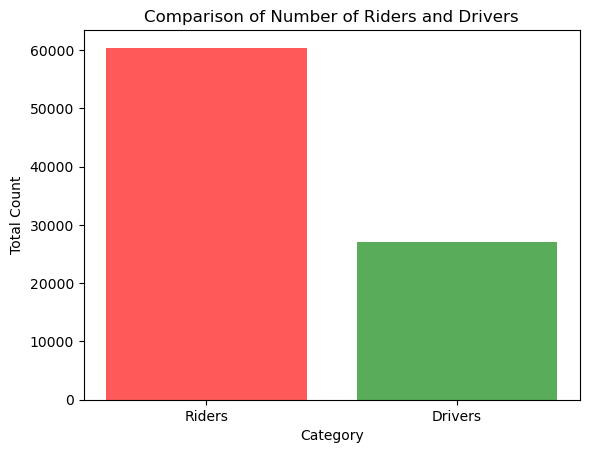

In [366]:
categories = ['Riders', 'Drivers']
values = [df['Number_of_Riders'].sum(), df['Number_of_Drivers'].sum()]

# Plot
plt.bar(categories, values, color=['red', 'green'],alpha = 0.65)
plt.title('Comparison of Number of Riders and Drivers')
plt.xlabel('Category')
plt.ylabel('Total Count')
plt.show()


The visualization above shows the number of riders and drivers, indicating which group is larger. 
This insight helps in understanding the relative scale of each group and can guide decisions on resource allocation or strategy

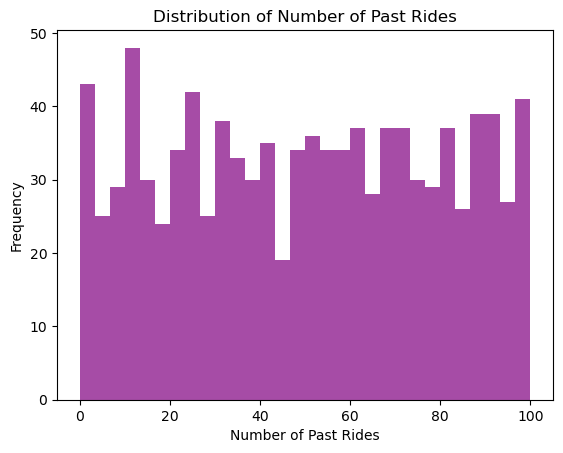

In [184]:
plt.hist(df['Number_of_Past_Rides'], bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Number of Past Rides')
plt.xlabel('Number of Past Rides')
plt.ylabel('Frequency')
plt.show()

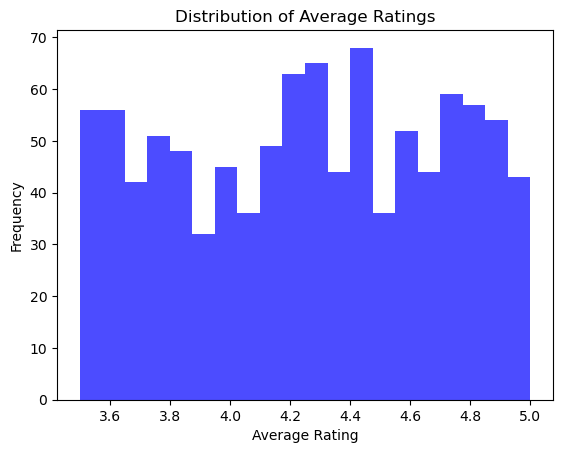

In [172]:
plt.hist(df['Average_Ratings'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

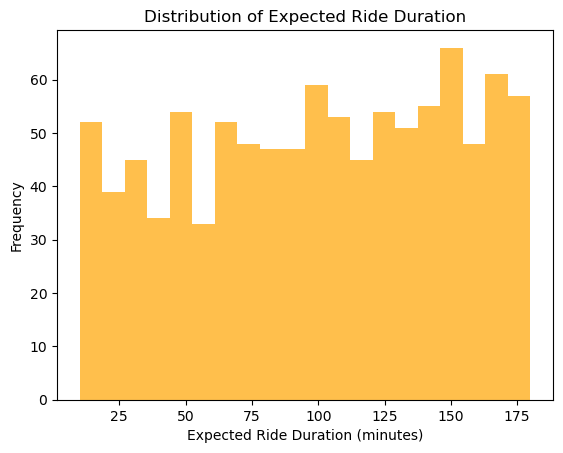

In [373]:
plt.hist(df['Expected_Ride_Duration'], bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Expected Ride Duration')
plt.xlabel('Expected Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

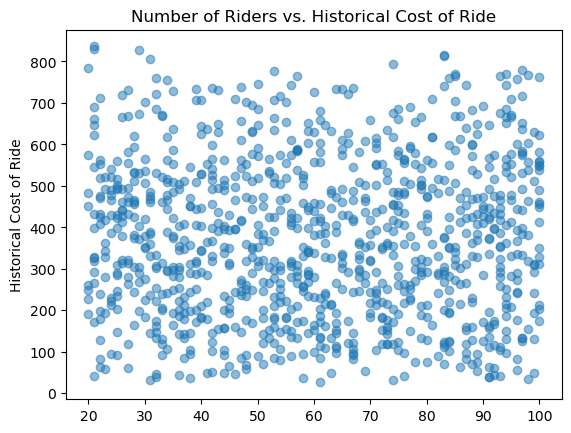

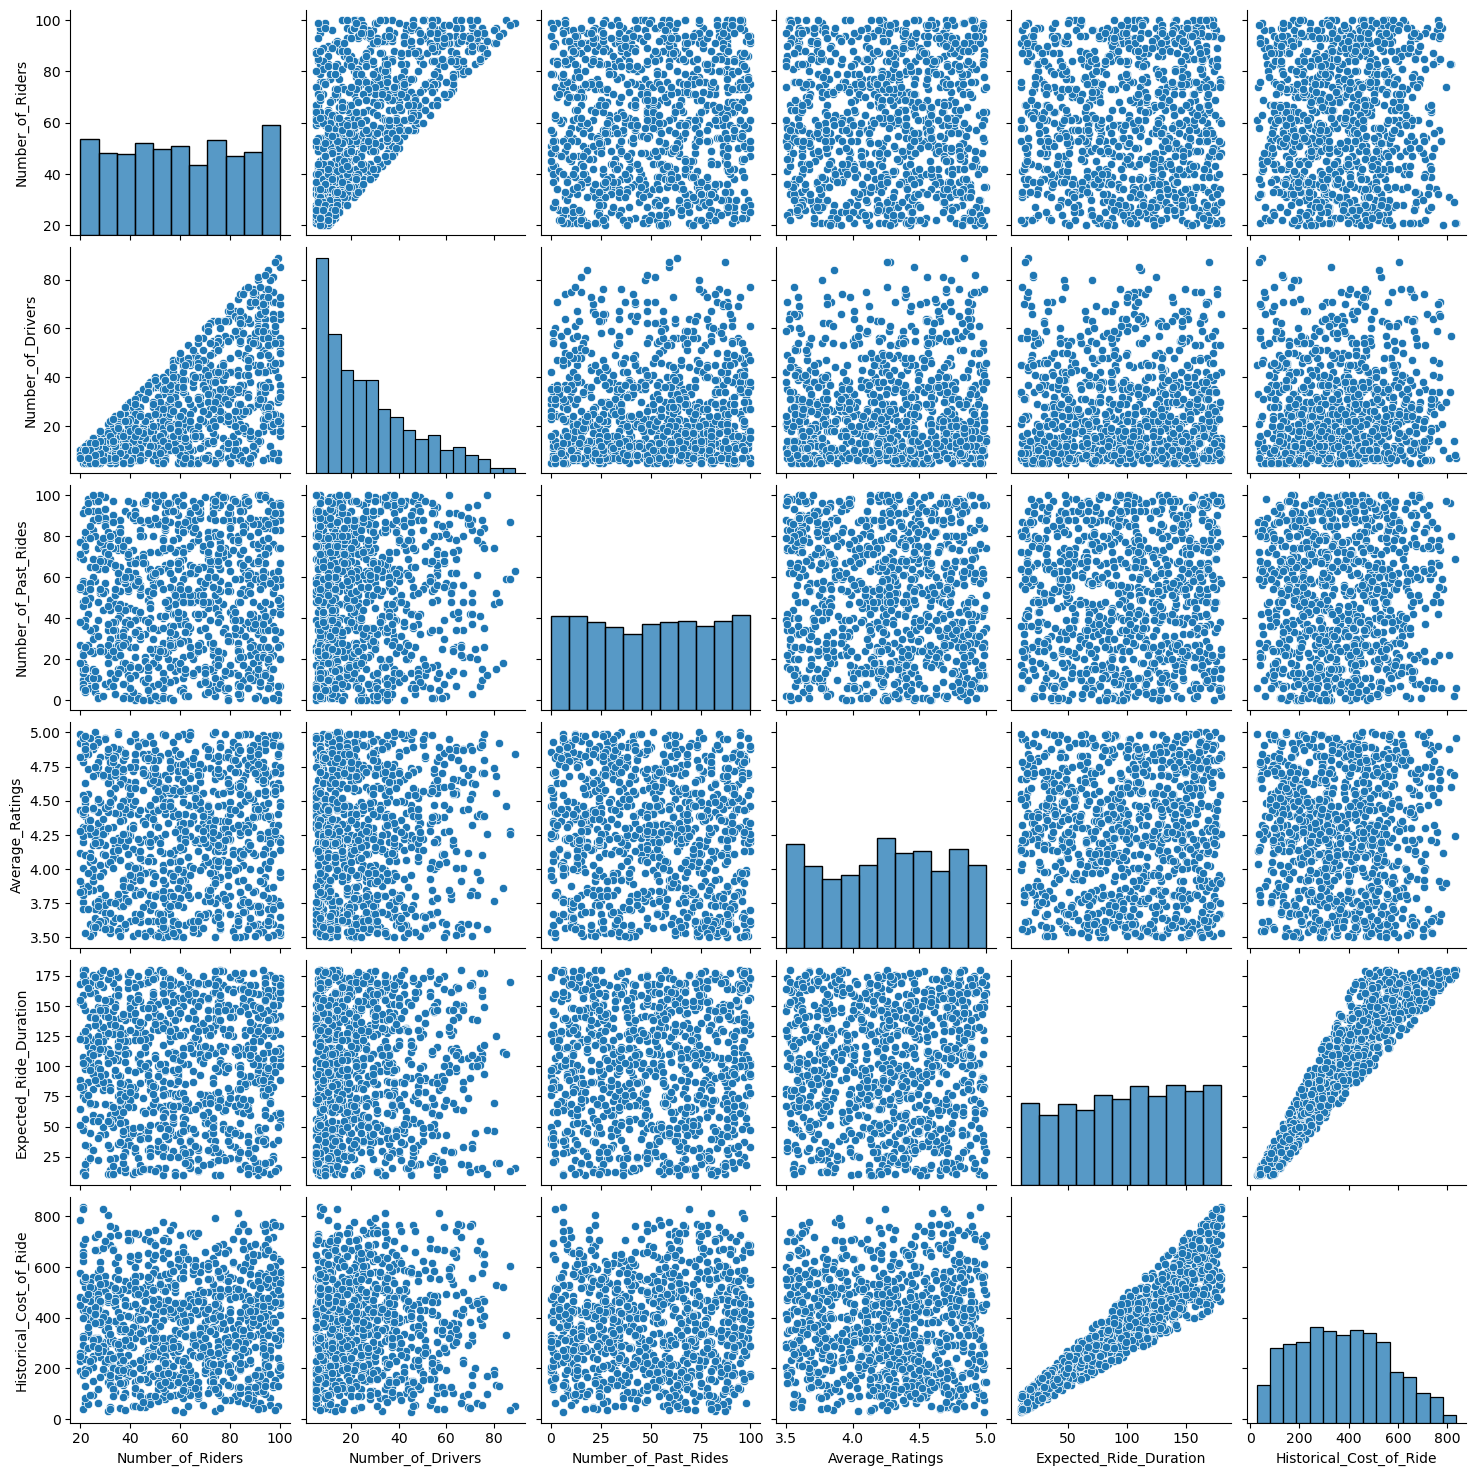

In [393]:
# Scatter Plot: Number of Riders vs. Historical Cost of Ride
plt.scatter(df['Number_of_Riders'], df['Historical_Cost_of_Ride'], alpha=0.5)
plt.title('Number of Riders vs. Historical Cost of Ride')
# plt.xlabel('Number of Riders')
plt.ylabel('Historical Cost of Ride')
plt.show()

# Pair Plot: To explore relationships among multiple numerical columns
sns.pairplot(df)
plt.show()


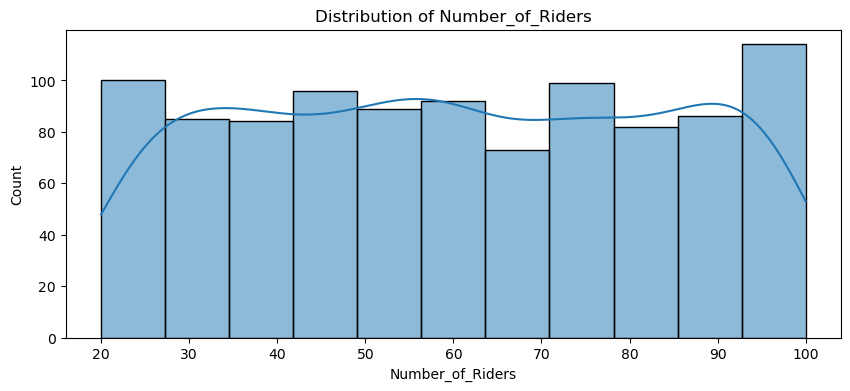

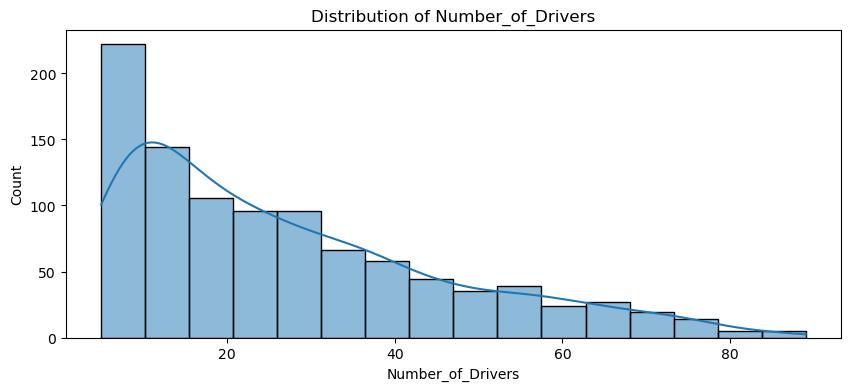

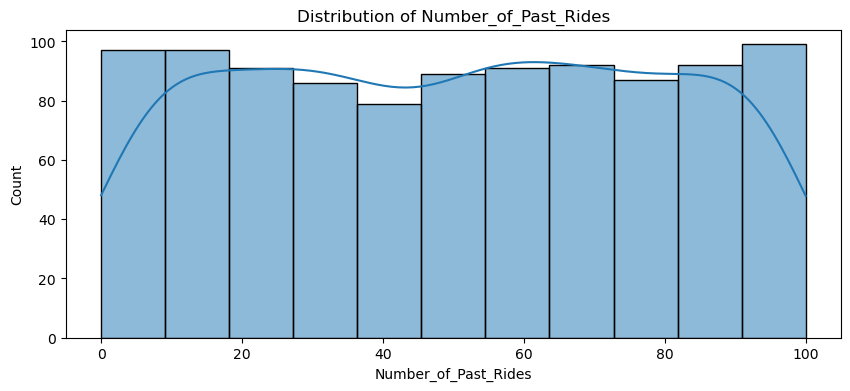

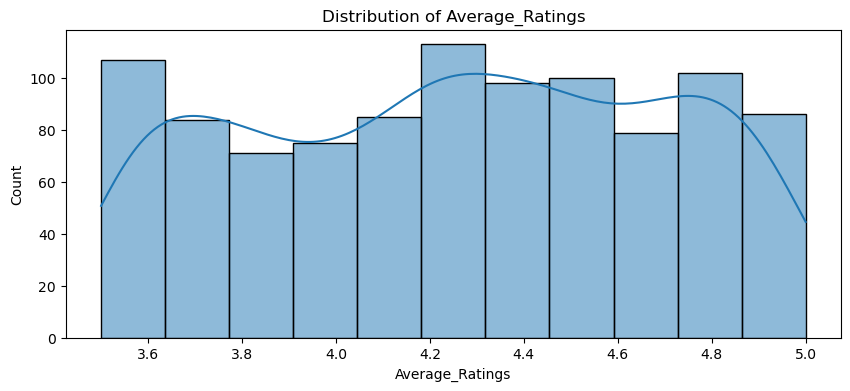

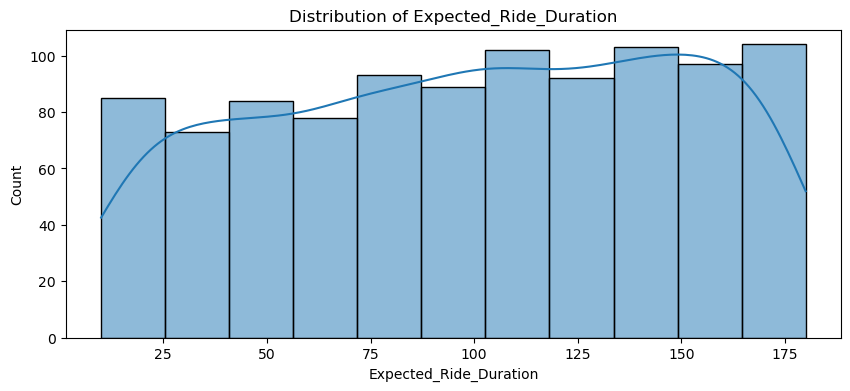

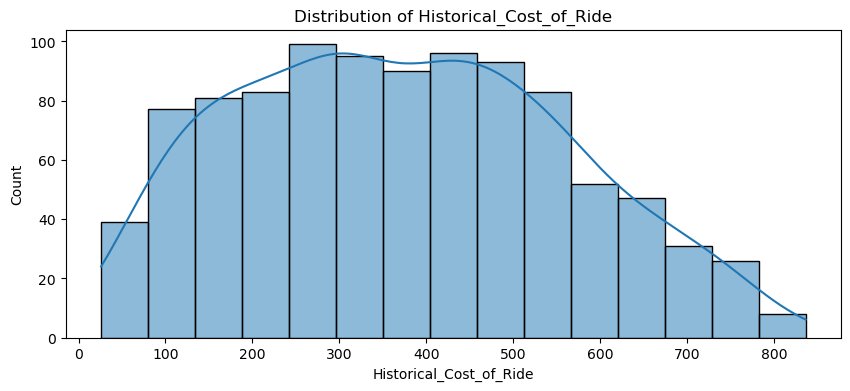

In [404]:
# List of numerical features
numerical_features = [
    'Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
    'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride'
]

# Plot distributions for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


### Visualizing Categorical features

In [377]:
df.describe(include='object')

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


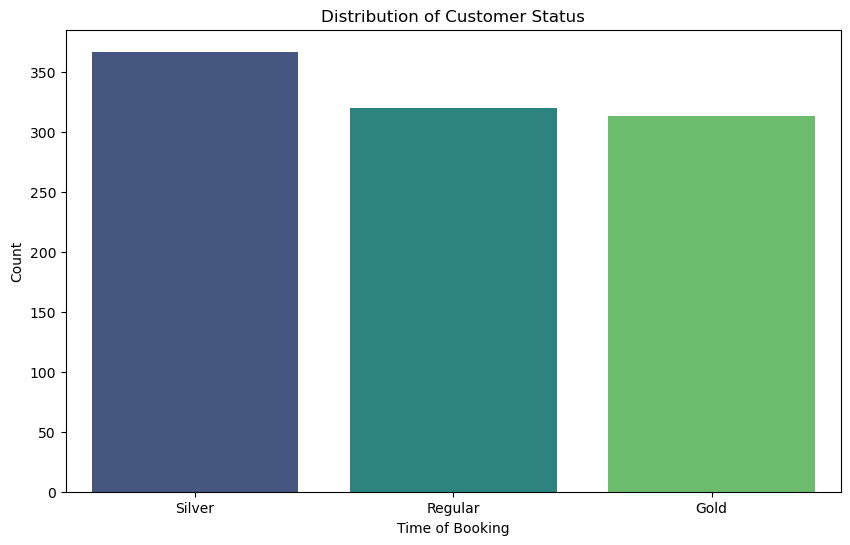

In [383]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer_Loyalty_Status', palette='viridis')

plt.title('Distribution of Customer Status')
plt.xlabel('Time of Booking')
plt.ylabel('Count')
plt.show()


### Insight:
The customer's badge shows that which status most customers lies on,in this case i.e. Silver.
To make customers reach more gold medals, certain strategies needs to be applied.

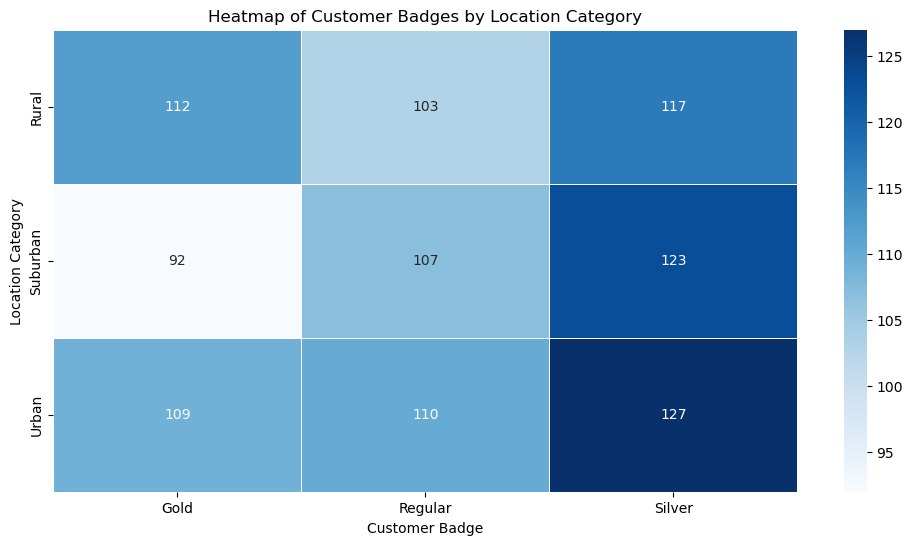

In [284]:
location_badge_counts = df.groupby(['Location_Category', 'Customer_Loyalty_Status']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(location_badge_counts, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Customer Badges by Location Category')
plt.xlabel('Customer Badge')
plt.ylabel('Location Category')
plt.show()


### Insight:
A heatmap of Customer Status by Location Category shows the distribution of badge statuses across locations, highlighting concentrations. This helps in understanding customer segments and optimizing resource allocation.

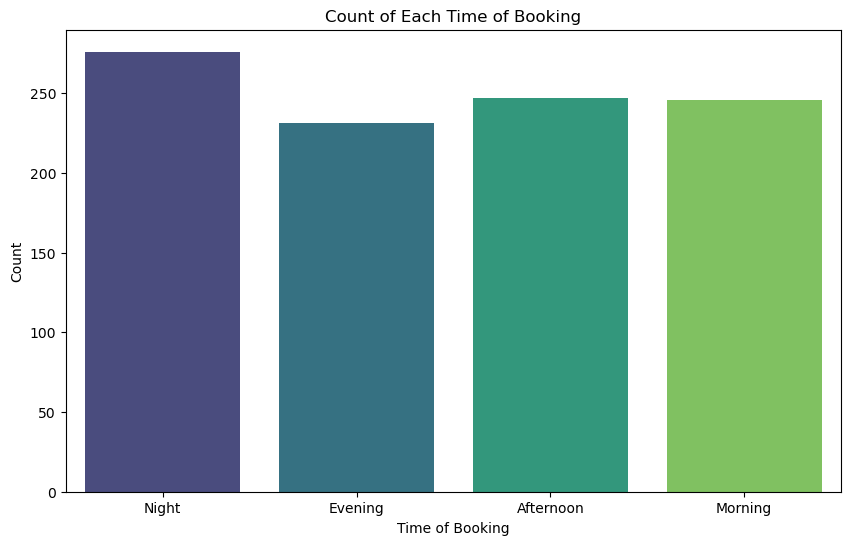

In [278]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time_of_Booking', palette='viridis')
plt.title('Count of Each Time of Booking')
plt.xlabel('Time of Booking')
plt.ylabel('Count')
plt.show()

### Insight:
The most common time of the booking of the rides is night time, so it is necessary to make sure that all the resources are highly available at night time then for the rest of the time.

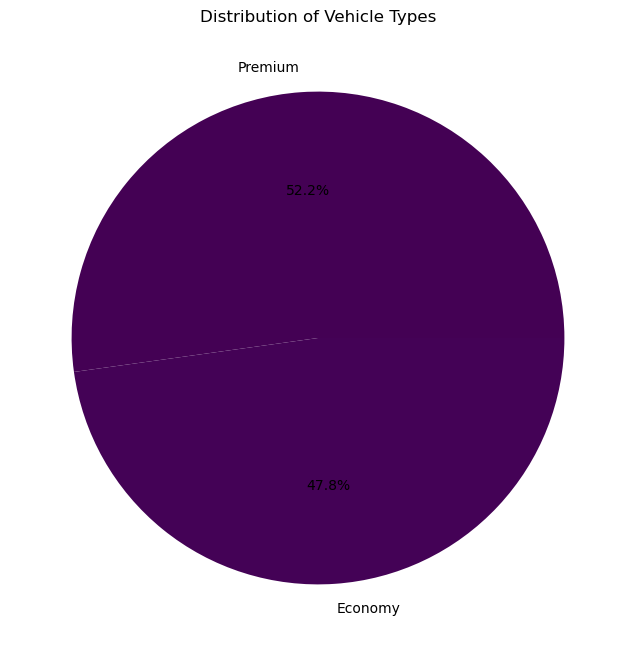

In [258]:
# Calculate counts of each Vehicle_Type
vehicle_type_counts = df['Vehicle_Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('viridis').colors)
plt.title('Distribution of Vehicle Types')
plt.show()


### Insight:
The above analysis of the vehicle types shows the economy type is few less than the premium type, to balance the vehicle type certain strategies should be applied to balance the category

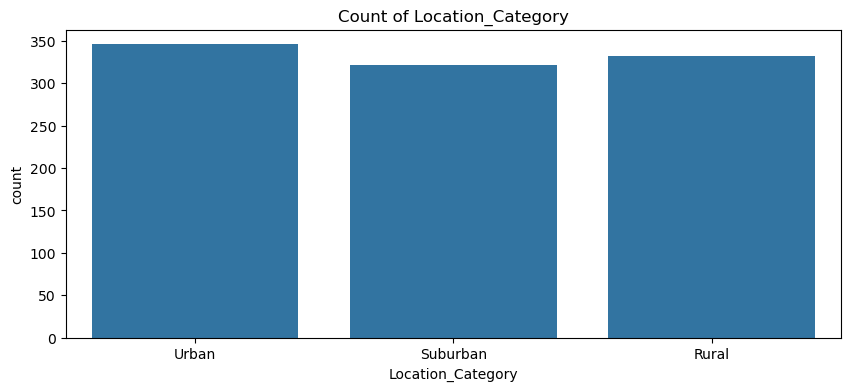

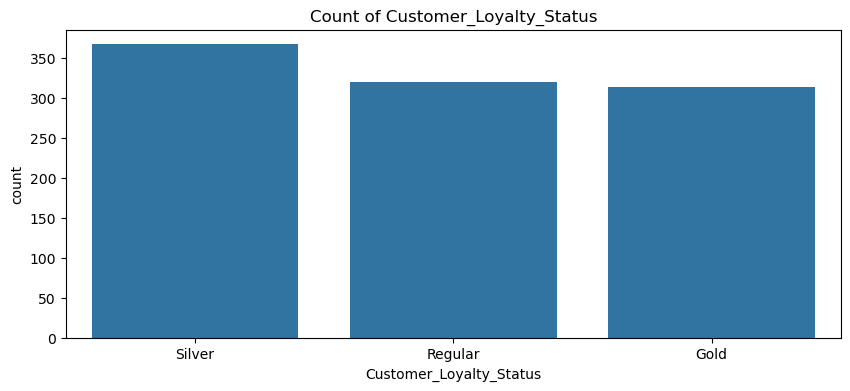

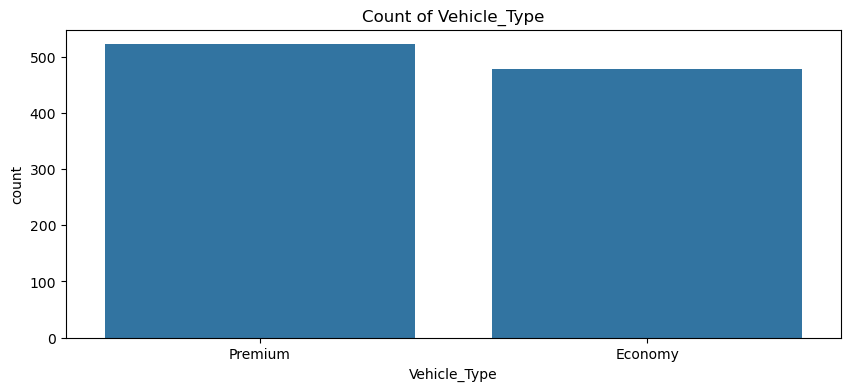

In [402]:
# List of categorical features
categorical_features = [
    'Location_Category', 'Customer_Loyalty_Status', 'Vehicle_Type'
]

# Plot counts for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[feature])
    plt.title(f'Count of {feature}')
    plt.show()


 ### Bivariate Analysis

Numerical Features:

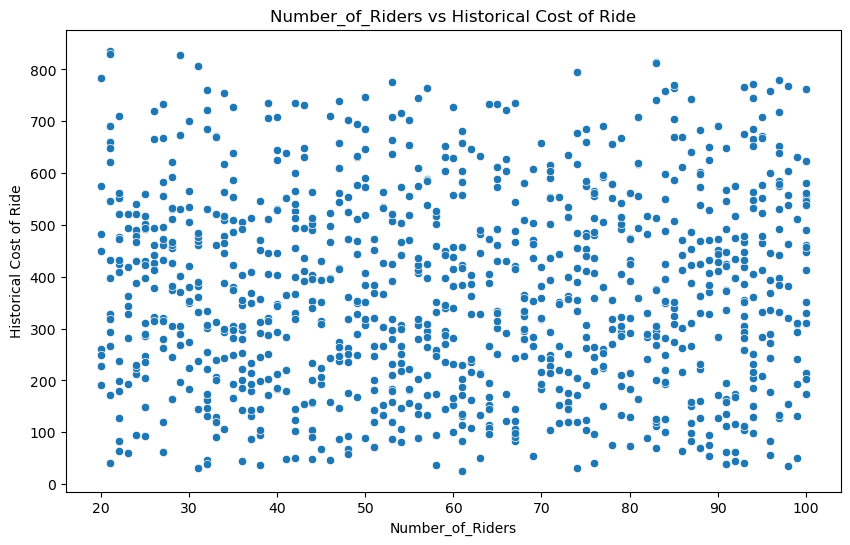

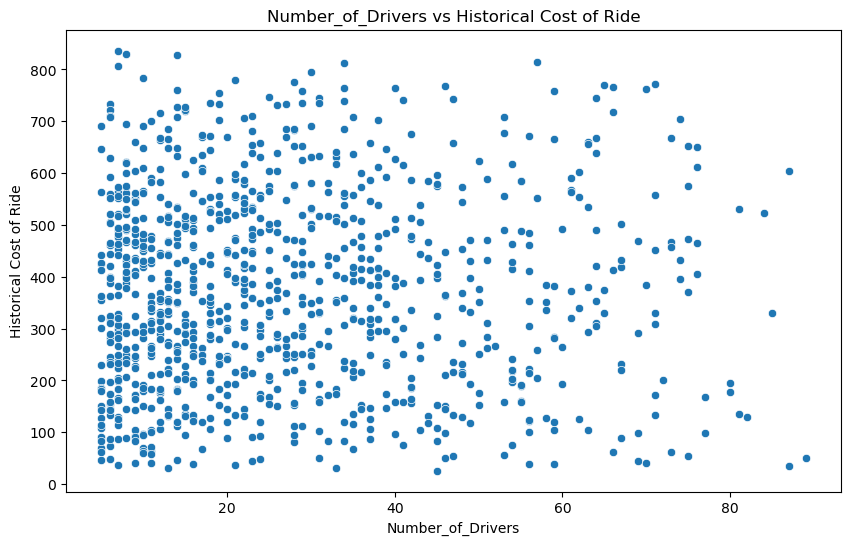

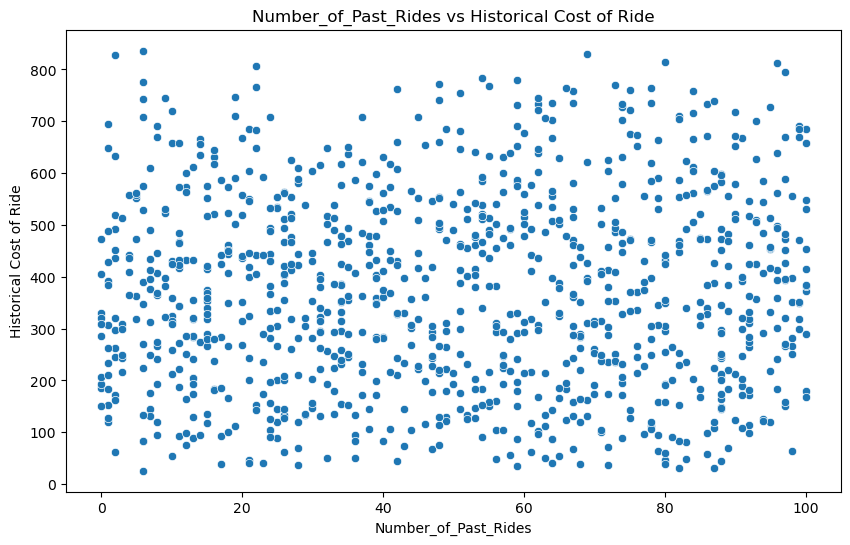

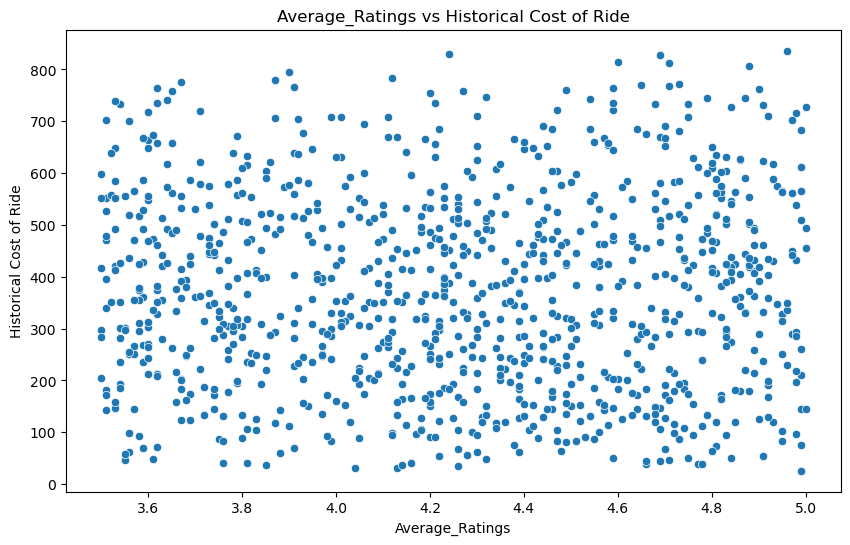

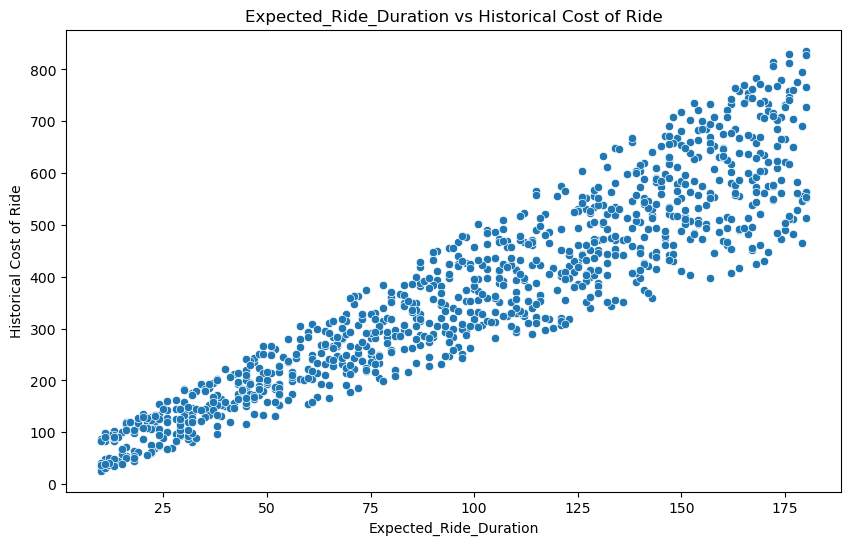

In [407]:
for feature in numerical_features:
    if feature != 'Historical_Cost_of_Ride':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[feature], y=df['Historical_Cost_of_Ride'])
        plt.title(f'{feature} vs Historical Cost of Ride')
        plt.xlabel(feature)
        plt.ylabel('Historical Cost of Ride')
        plt.show()


Categorical Features:

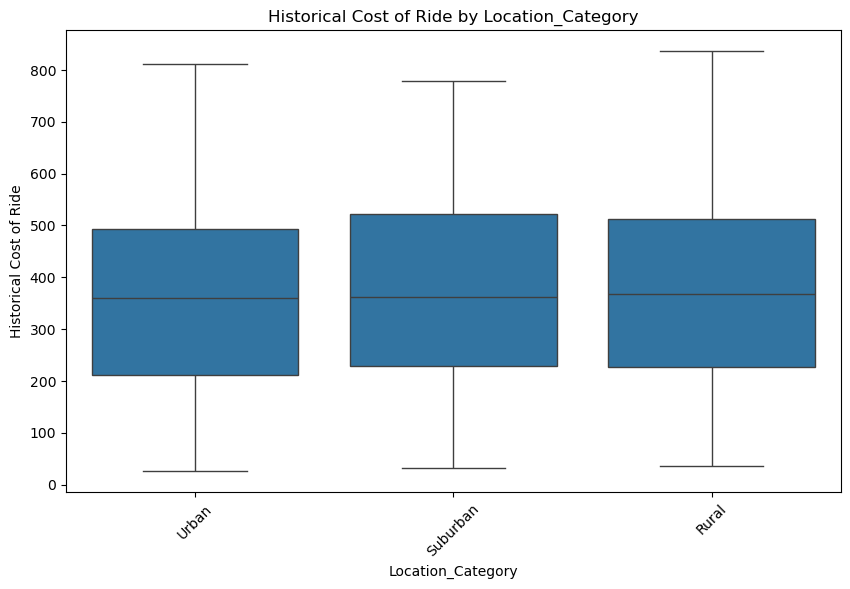

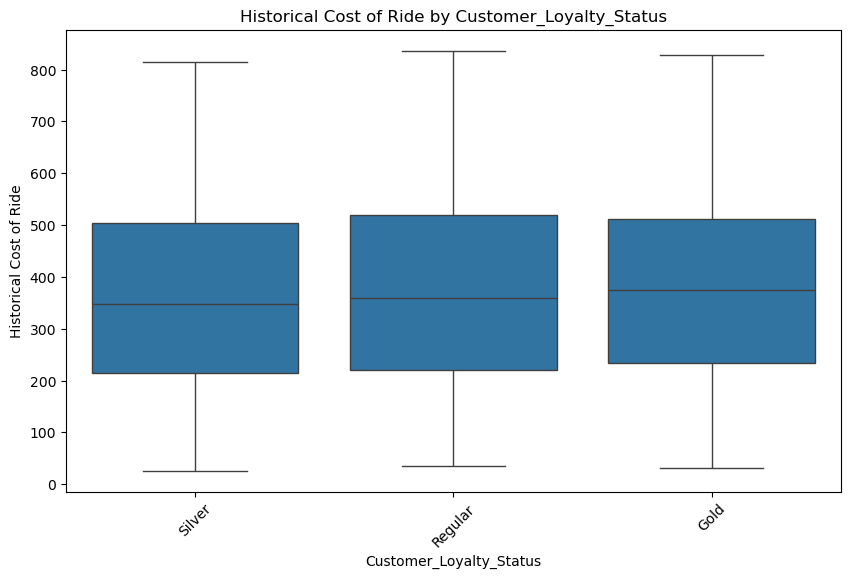

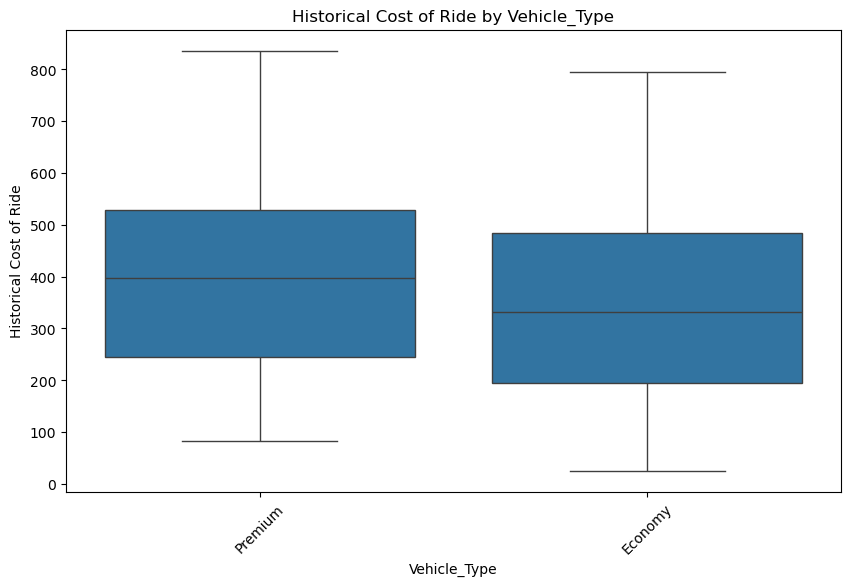

In [410]:
# Box plots for categorical features vs Historical_Cost_of_Ride
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature], y=df['Historical_Cost_of_Ride'])
    plt.title(f'Historical Cost of Ride by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Historical Cost of Ride')
    plt.xticks(rotation=45)
    plt.show()


### Summary of Insights

Numerical Features:
 The features like Number_of_Riders, Number_of_Drivers, Expected_Ride_Duration, etc., have normal distributions or are skewed.
Features with greater skew might need transformation.

Categorical Features:

Look into the categories which are more frequent.
Ride Cost Variance: Box plots show how Historical_Cost_of_Ride varies across different categories. 
The Features with significant variance could be crucial for predicting ride costs.